# Dependencies and imports

For how to use nibabel watch from 1:14:04- https://www.youtube.com/watch?v=Y6ulmOlW1FI&t=4718s \
CNN for cortical surface segmentation (not our goal but good explaination)- https://www.youtube.com/watch?v=2KHYIrL7Lyo \
Label key- https://alivelearn.net/?p=175

In [3]:
# # Download programs to computer for working with the data

# !pip install nilearn
# !pip install nibabel

  Using cached nilearn-0.8.0-py3-none-any.whl (4.9 MB)
  Using cached nibabel-3.2.1-py3-none-any.whl (3.3 MB)


In [4]:
import nibabel as nb
import nilearn
from nilearn import plotting
import nibabel.freesurfer as nbf

/Users/DrV/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/nilearn/datasets/__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [24]:
# Participant surface, curve, thickness, volume data
raw_path = '../mri_personality/data/sub_0001/'
!ls ../mri_personality/data/sub_0001

lh.aparc.annot lh.curv        lh.sphere      lh.sulc
lh.avg_curv    lh.pial        lh.sphere.reg  lh.thickness


# Loading data

### Surfaces to plot data on

In [25]:
'''Created by expanding the white surface so that it closely follows the gray-CSF 
intensity gradient as found in the T1 volume'''

pial_test = raw_path+'lh.pial'
fs_pial_verts, fs_pial_faces, fs_pial_meta= nb.freesurfer.read_geometry(pial_test, read_metadata = True)

In [101]:
print(fs_pial_verts.shape)
print(fs_pial_faces.shape)
fs_pial_meta # I don't think we'll need this

(131504, 3)
(263004, 3)


OrderedDict([('head', array([ 2,  0, 20], dtype=int32)),
             ('valid', '1  # volume info valid'),
             ('filename', '../mri/filled-pretess255.mgz'),
             ('volume', array([256, 256, 256])),
             ('voxelsize', array([1., 1., 1.])),
             ('xras',
              array([-1.00000000e+00, -1.86264515e-09, -9.31322575e-10])),
             ('yras', array([ 0.,  0., -1.])),
             ('zras', array([1.97906047e-09, 1.00000000e+00, 0.00000000e+00])),
             ('cras', array([-0.21006012,  6.64082336, 21.44644165]))])

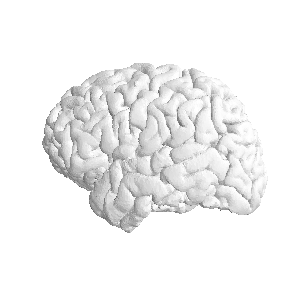

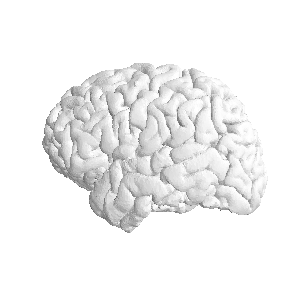

In [102]:
# Plotting this data without surface data

nilearn.plotting.plot_surf((fs_pial_verts, fs_pial_faces))

In [12]:
# Inflates the orig surface into a sphere while minimizing metric distortion

sphere_test = raw_path+'lh.sphere'
fs_sphere_verts, fs_sphere_faces, fs_sphere_meta= nb.freesurfer.read_geometry(sphere_test, read_metadata = True)

In [94]:
print(fs_sphere_verts.shape) # coords: nvtx x 3 array of vertex (x, y, z) coordinates
print(fs_sphere_faces.shape) # faces: nfaces x 3 array of defining mesh triangles
fs_sphere_meta # I don't think we'll need this

(131504, 3)
(263004, 3)


OrderedDict([('head', array([ 2,  0, 20], dtype=int32)),
             ('valid', '1  # volume info valid'),
             ('filename', '../mri/filled-pretess255.mgz'),
             ('volume', array([256, 256, 256])),
             ('voxelsize', array([1., 1., 1.])),
             ('xras',
              array([-1.00000000e+00, -1.86264515e-09, -9.31322575e-10])),
             ('yras', array([ 0.,  0., -1.])),
             ('zras', array([1.97906047e-09, 1.00000000e+00, 0.00000000e+00])),
             ('cras', array([-0.21006012,  6.64082336, 21.44644165]))])

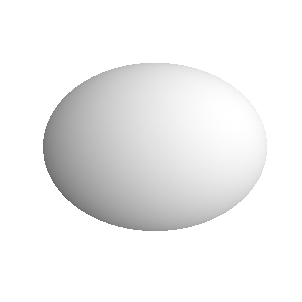

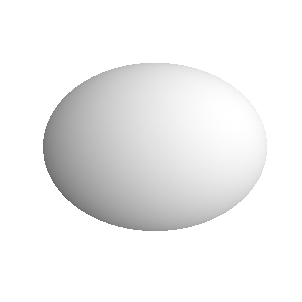

In [98]:
# Plotting this data without surface data

nilearn.plotting.plot_surf((fs_sphere_verts, fs_sphere_faces))

In [13]:
# Spheres registered to a template space

'''Registers the orig surface to the spherical atlas through surf/?h.sphere. The surfaces are first coarsely registered by 
aligning the large scale folding patterns found in ?h.sulc and then fine tuned using the small-scale patterns as in ?h.curv.'''

sphere_reg_test = raw_path+'lh.sphere.reg'
fs_sphere_reg_verts, fs_sphere_reg_faces, fs_sphere_reg_meta= nb.freesurfer.read_geometry(sphere_reg_test, read_metadata = True)

### Surface data and plots

In [14]:
# Represents the curvature of the white matter at that location

lh_curv_test = raw_path+'lh.curv'
lh_curv = nb.freesurfer.read_morph_data(lh_curv_test)
lh_curv.shape

(131504,)

In [15]:
'''Resamples the average curvature from the atlas to that of the subject. Allows the user to 
display activity on the surface of an individual with the folding pattern (ie, anatomy) of a group'''

lh_avg_curv_test = raw_path+'lh.avg_curv'
lh_avg_curv = nb.freesurfer.read_morph_data(lh_avg_curv_test)
lh_avg_curv.shape

(131504,)

In [16]:
# Represents the ridges and grooves

lh_sulc_test = raw_path+'lh.sulc'
lh_sulc = nb.freesurfer.read_morph_data(lh_sulc_test)
lh_sulc.shape

(131504,)

In [17]:
# How thick the cortex is over different regions- best candidate for target

lh_thick_test = raw_path+'lh.thickness'
lh_thick = nb.freesurfer.read_morph_data(lh_thick_test)
lh_thick.shape

(131504,)

In [18]:
# Cortical labels from Desikan-Killiany atlas

label_test = raw_path+'lh.aparc.annot'
lh_labels, lh_colour_table, lh_names = nb.freesurfer.read_annot(label_test)

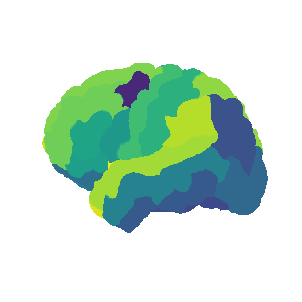

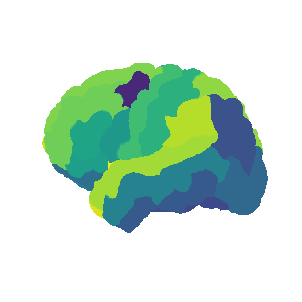

In [66]:
# Plotting cortical labels

nilearn.plotting.plot_surf((fs_pial_verts, fs_pial_faces), lh_labels)

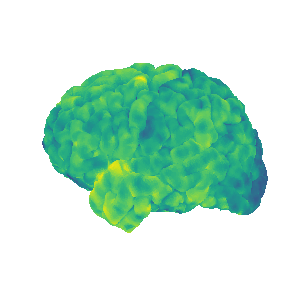

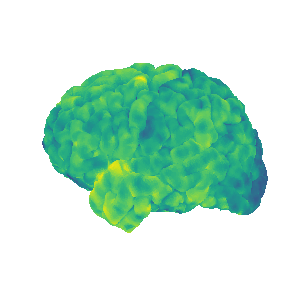

In [88]:
# Plotting cortical thickness

nilearn.plotting.plot_surf((fs_pial_verts, fs_pial_faces), lh_thick)

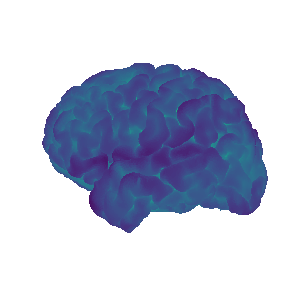

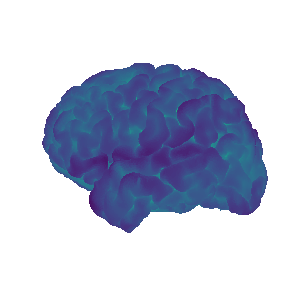

In [89]:
# Plotting grooves and ridges labels

nilearn.plotting.plot_surf((fs_pial_verts, fs_pial_faces), lh_sulc)

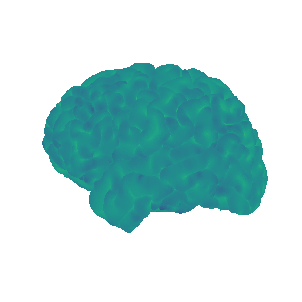

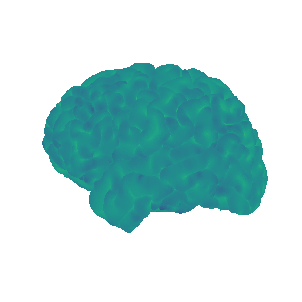

In [90]:
# Plotting coritcal curvature

nilearn.plotting.plot_surf((fs_pial_verts, fs_pial_faces), lh_curv)

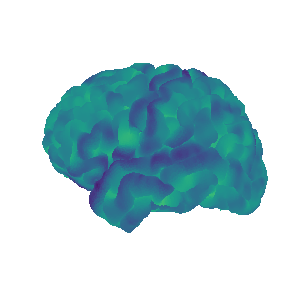

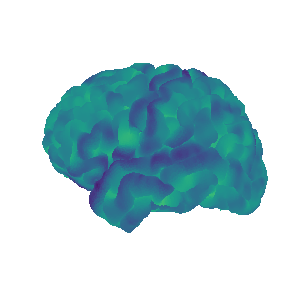

In [91]:
# Plotting average cortical curvature

nilearn.plotting.plot_surf((fs_pial_verts, fs_pial_faces), lh_avg_curv)

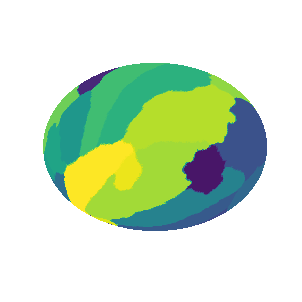

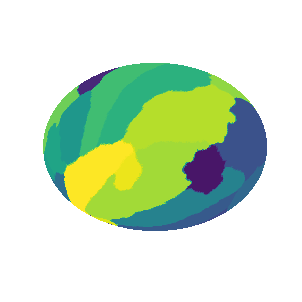

In [103]:
# Plotting cortical labels

nilearn.plotting.plot_surf((fs_sphere_verts, fs_sphere_faces), lh_labels)

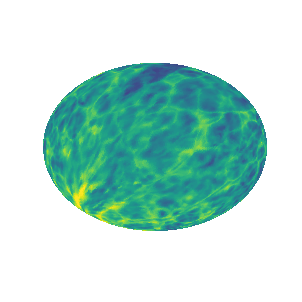

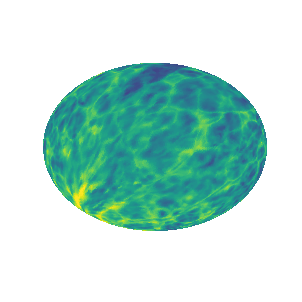

In [70]:
# Plotting coritcal thickness on registered sphere

nilearn.plotting.plot_surf((fs_sphere_reg_verts, fs_sphere_reg_faces), lh_thick)

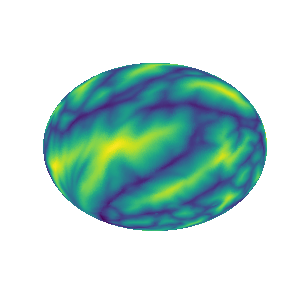

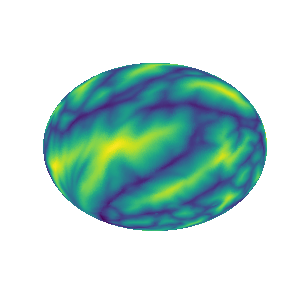

In [104]:
# Plotting grooves and ridges labels

nilearn.plotting.plot_surf((fs_sphere_reg_verts, fs_sphere_reg_faces), lh_sulc)

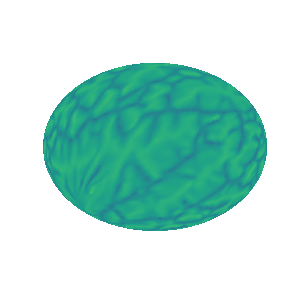

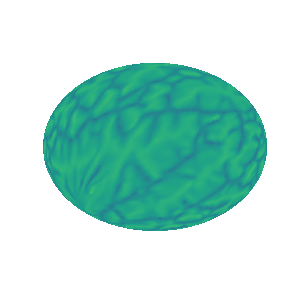

In [78]:
# Plotting coritcal curvature

nilearn.plotting.plot_surf((fs_sphere_verts, fs_sphere_faces), lh_curv)

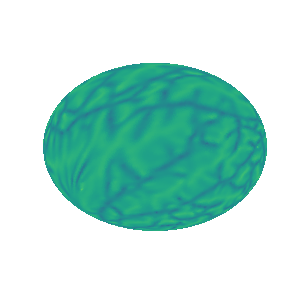

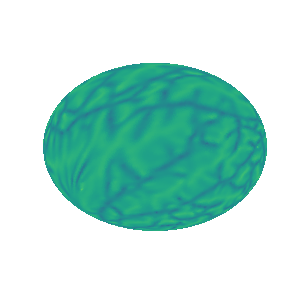

In [82]:
# Plotting coritcal curvature on registered sphere

nilearn.plotting.plot_surf((fs_sphere_reg_verts, fs_sphere_reg_faces), lh_curv)

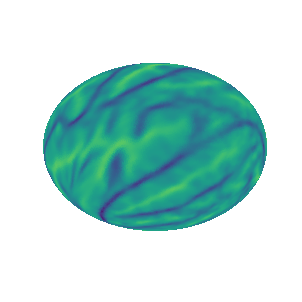

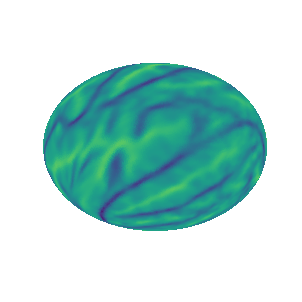

In [87]:
# Plotting average coritcal curvature on registered sphere

nilearn.plotting.plot_surf((fs_sphere_reg_verts, fs_sphere_reg_faces), lh_avg_curv)

### Best candidate for CNN

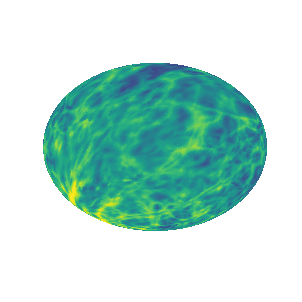

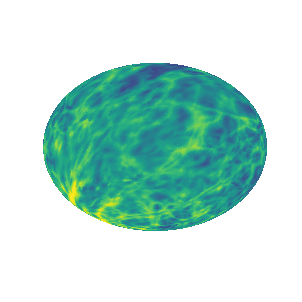

In [107]:
# Plotting coritcal thickness on registered sphere

nilearn.plotting.plot_surf((fs_sphere_reg_verts, fs_sphere_reg_faces), lh_thick)